# Project: TMDB movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.

In [3]:
# dependencies
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data Wrangling

I'll tinker around the datasets to refine it and prepare it for EDA.

In [4]:
# read in the data
df = pd.read_csv('tmdb.csv')

In [5]:
# have a quick glance at the data
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
# sumary statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning

- Remove unnecessary columns
- Drop missing values
- Drop duplicates
- Reformat string with '|' to a list

In [7]:
# drop columns
df.drop(['imdb_id', 'homepage', 'release_date'], axis=1, inplace=True)

In [8]:
# drop missing values
dfNullity = df.isnull()
dfNullity = dfNullity.sum()
dfNullity = dfNullity.to_frame().reset_index()
dfNullity.rename(columns={'index':'col', 0:'nullCount'}, inplace=True)
dfNullity.query('nullCount > 0', inplace=True)
print(dfNullity) # find columns with missing values and how many rows are missing

df.dropna(inplace=True) 
print(df.isnull().sum()) # confirm that there is no other missing value

                     col  nullCount
5                   cast         76
6               director         44
7                tagline       2824
8               keywords       1493
9               overview          4
11                genres         23
12  production_companies       1030
id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64


In [9]:
# drop duplicated rows
print ('Number of duplicates originally:', df.duplicated().sum()) # check for duplicates
df.drop_duplicates(inplace=True) # drop duplicates
print ('Number of duplicates afterwards:', df.duplicated().sum()) # confirm absence of duplicate

# reset index after droping missing values
df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace=True)

Number of duplicates originally: 1
Number of duplicates afterwards: 0


In [10]:
# df.assign(cast=df.cast.str.split('|')).explode('cast')
# reformat date column
# df.release_date = pd.to_datetime(df.release_date, infer_datetime_format=True)

In [11]:
# reformat strings with '|' to lists
columnList = ['cast', 'genres', 'keywords', 'production_companies']
for column in columnList:
    df[column] = df[column].apply(lambda x: x.split('|'))

Having performed basic cleaning, it's time to go deeper. Examine the data and find out if there are missing values that are not in 'nan' format.
For example, if a row in the 'budget' column is 0 should this be treated as a missing value?

**Ocurrences like this will be treated as NO BUDGET MOVIES**

<br>

Because the data is not documented, we cannot tell the currenchy but a google search of the [Insurget buddget](https://www.google.com/search?q=budget+for+insurgent&sxsrf=ALiCzsasLzTnQiA72_PQ9i5Xi-Jh6iFnRQ%3A1652594570739&ei=ipeAYqvlLNKD8gKB9bY4&oq=budget+for+insurgetnt&gs_lcp=Cgdnd3Mtd2l6EAMYADIHCCEQChCgATIHCCEQChCgAToHCAAQRxCwAzoHCCMQsAIQJzoECAAQDToECCMQJzoFCAAQgAQ6BQgAEJECOggIABAPEBYQHjoGCAAQFhAeOgUIIRCgAUoECEEYAEoECEYYAFD8AljqJmDwM2gCcAF4AIABywKIAZI0kgEIMC4yLjI0LjOYAQCgAQHIAQjAAQE&sclient=gws-wiz/) shows a match with what is on the data.

**So we can say that the financial values are in USD**

<br>

Some of the columns are lists, exploding/unnesting them will make the dataframe have so many rows and would take up more memory space.

**For any question if necessary, the column will be exploded/unnested**

## Exploratory Data Analysis

### Which genres are most popular from year to year?

There are about 56 years in the data, so it is split into the past 5 yeaars (2011 - 2015)

In [12]:
# groupby thee year and genres, select the popularityh column
genres = df.explode('genres')
genres = genres.groupby(by=['release_year', 'genres']).sum()['popularity']
genres = genres.reset_index() 

# filter to 5 years ago
genres.query('release_year >= 2011')

df2011 = genres.query('release_year == 2011')
df2012 = genres.query('release_year == 2012')
df2013 = genres.query('release_year == 2013')
df2014 = genres.query('release_year == 2014')
df2015 = genres.query('release_year == 2015')

df2011 = df2011[df2011.popularity == df2011.popularity.max()]
df2012 = df2012[df2012.popularity == df2012.popularity.max()]
df2013 = df2013[df2013.popularity == df2013.popularity.max()]
df2014 = df2014[df2014.popularity == df2014.popularity.max()]
df2015 = df2015[df2015.popularity == df2015.popularity.max()]

# concat the five years values into one DF
genres = pd.concat([df2011, df2012, df2013, df2014, df2015], ignore_index=True)
genres

,release_year,genres,popularity
0,2011,Thriller,100.539515
1,2012,Drama,108.156863
2,2013,Drama,128.664750
3,2014,Action,198.987352
4,2015,Action,221.309653


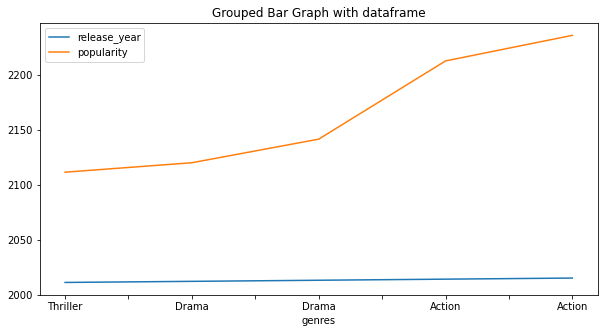

In [40]:
# plot grouped bar chart
genres.plot(x='genres',
        kind='line',
        stacked=True,
        title='Grouped Bar Graph with dataframe',
        figsize=(10,5));

### What kinds of properties are associated with movies that have high revenues?

In [ ]:
# correlation table
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,0.059001,-0.101641,-0.067851,-0.082703,0.012479,-0.091744,0.484502,-0.161177,-0.119847
popularity,0.059001,1.000000,0.521981,0.653280,0.189413,0.798939,0.272979,0.169882,0.486096,0.594809
budget,-0.101641,0.521981,1.000000,0.725662,0.249326,0.618222,0.100464,0.217755,0.967213,0.602990
revenue,-0.067851,0.653280,0.725662,1.000000,0.220666,0.782714,0.217408,0.128270,0.696864,0.915085
runtime,-0.082703,0.189413,0.249326,0.220666,1.000000,0.227124,0.260809,-0.103767,0.293687,0.239720
vote_count,0.012479,0.798939,0.618222,0.782714,0.227124,1.000000,0.320417,0.182409,0.569737,0.695303
vote_average,-0.091744,0.272979,0.100464,0.217408,0.260809,0.320417,1.000000,-0.128344,0.115151,0.244492
release_year,0.484502,0.169882,0.217755,0.128270,-0.103767,0.182409,-0.128344,1.000000,0.111404,-0.013536
budget_adj,-0.161177,0.486096,0.967213,0.696864,0.293687,0.569737,0.115151,0.111404,1.000000,0.630160
revenue_adj,-0.119847,0.594809,0.602990,0.915085,0.239720,0.695303,0.244492,-0.013536,0.630160,1.000000


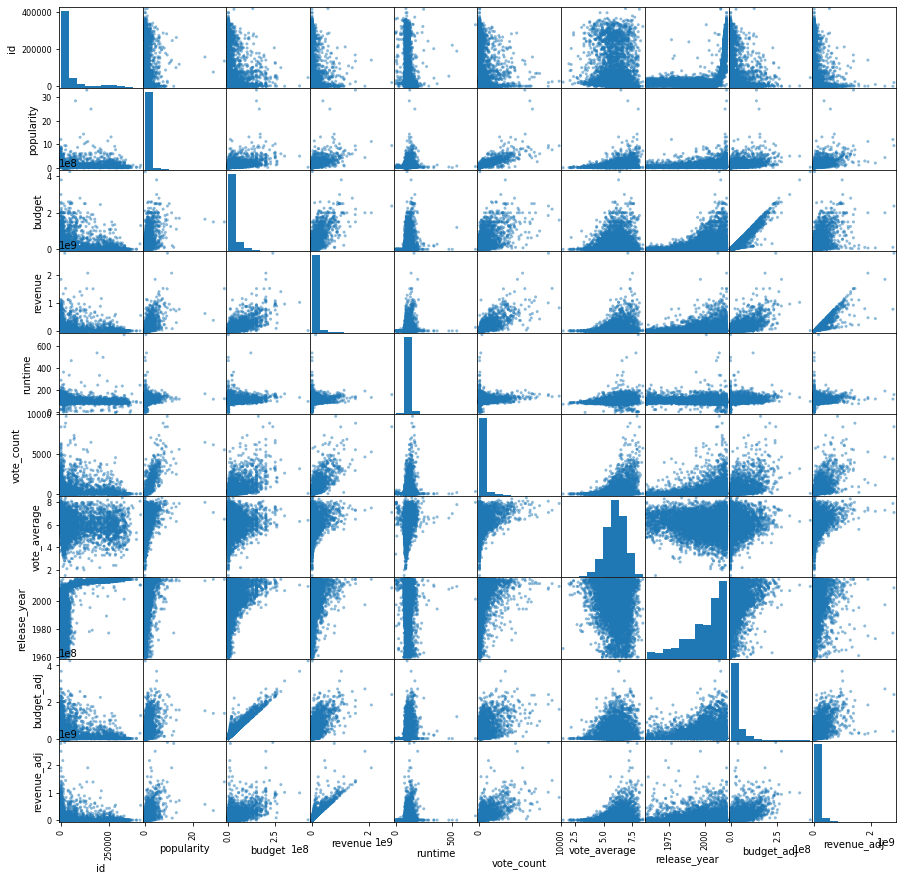

In [ ]:
# plot a correlation matrix
pd.plotting.scatter_matrix(df, figsize = (15,15));

**budget**, **vote_count**, and **popularity** are associated with high revenue movies

### How many movies are no budget movies and how do they compare in popularity and total vote average to movies with a budget?

In [ ]:
noBudget = df[df.budget.isin([0])]
budget = df[~df.budget.isin([0])]

noBudget.reset_index(inplace=True)
budget.reset_index(inplace=True)

print('There are', noBudget.shape[0], 'no-budget movies')
print('There are', budget.shape[0], 'movies with a financial budget', '\n')

print('No-budget movies have a total popularity of:', round(noBudget.popularity.sum()))
print('Movies with a financial budget have a total popularity of:', round(budget.popularity.sum()), '\n')

print('No-budget movies have a total vote average of:', round(noBudget.vote_average.sum()))
print('Movies with a financail budget have a total vote average of:', round(budget.vote_average.sum()), '\n')

print('On an average, no-budget movies make around', round(noBudget.revenue_adj.mean()), 'USD')
print('On an average, movies with a financial budget make around', round(budget.revenue_adj.mean()), 'USD')

There are 2766 no-budget movies
There are 4265 movies with a financial budget 

No-budget movies have a total popularity of: 1089
Movies with a financial budget have a total popularity of: 4743 

No-budget movies have a total vote average of: 16303
Movies with a financail budget have a total vote average of: 25977 

On an average, no-budget movies make around 9419484 USD
On an average, movies with a financial budget make around 119907511 USD


we can see that **popularity**, **vote_average**, and **revenue_adj**... moves that have a financial budget perform better than no-budget movies

In [41]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,7031.000000,7031.000000,7.031000e+03,7.031000e+03,7031.000000,7031.000000,7031.000000,7031.000000,7.031000e+03,7.031000e+03
mean,51930.810411,0.829496,2.084295e+07,5.932460e+07,104.839994,312.713128,6.013384,1999.382307,2.500879e+07,7.644145e+07
std,81407.049737,1.180266,3.602356e+07,1.404161e+08,23.804709,693.227171,0.876495,13.468579,3.953511e+07,1.730470e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,9540.500000,0.278563,0.000000e+00,0.000000e+00,92.000000,24.000000,5.500000,1992.000000,0.000000e+00,0.000000e+00
50%,14741.000000,0.506241,5.000000e+06,4.858139e+06,101.000000,73.000000,6.100000,2003.000000,6.951084e+06,6.448898e+06
75%,46983.500000,0.956339,2.600000e+07,5.472242e+07,114.000000,263.000000,6.600000,2010.000000,3.463336e+07,7.526298e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


### Most popular actors in an action film

In [57]:
dfActionActor = df.query('release_year == 2015 or release_year == 2014')
dfActionActor = dfActionActor.explode('cast')
dfActionActor = dfActionActor.explode('genres')
dfActionActor = dfActionActor.groupby(by=['cast', 'genres']).sum()['popularity']
dfActionActor = dfActionActor.reset_index()
dfActionActor = dfActionActor.query('genres == "Action"')
dfActionActor = dfActionActor.sort_values(by=['popularity'], ascending=False)
dfActionActor.head(10)

,cast,genres,popularity
1339,Chris Pratt,Action,47.296968
2814,Irrfan Khan,Action,32.985763
6988,Vincent D'Onofrio,Action,32.985763
1045,Bryce Dallas Howard,Action,32.985763
5295,Nick Robinson,Action,32.985763
5256,Nicholas Hoult,Action,28.930232
2741,Hugh Keays-Byrne,Action,28.419936
6803,Tom Hardy,Action,28.419936
3624,Josh Helman,Action,28.419936
1252,Charlize Theron,Action,28.419936


## Conclusions

In Summary and as the data suggests, a high performing movie would require a budget. The average budget spent on a movie is, **25,008,790 USD** but well assured the invested money will yeild high returns as the averge revenuw on a movie is, **76,441,450 USD** which is thrice the average budget spend

<br>

The fans love a good action movie so if you want you movie to be very popular, it should be an action movie and you probably wanna cast actors like, **Chris Pratt**, **Irrfan Khan**, and **Vincent D'Onofrio**